In [128]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, AlphaDropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Keras/Diabetes Binary Classification.csv')

In [3]:
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop(columns='Class variable (0 or 1)')
y = df['Class variable (0 or 1)']
X = X.values
y = y.values

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sigmoid Activation Function

In [7]:
model = Sequential()

model.add(Dense(16, input_shape=(8,), activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train_scaled, Y_train, epochs=50, validation_data=(X_test_scaled, Y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7845 - loss: 0.4761 - val_accuracy: 0.8052 - val_loss: 0.4450
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7633 - loss: 0.4686 - val_accuracy: 0.8052 - val_loss: 0.4451
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7971 - loss: 0.4532 - val_accuracy: 0.8052 - val_loss: 0.4449
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7776 - loss: 0.4778 - val_accuracy: 0.8052 - val_loss: 0.4446
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7611 - loss: 0.4793 - val_accuracy: 0.7922 - val_loss: 0.4456
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7826 - loss: 0.4522 - val_accuracy: 0.8052 - val_loss: 0.4443
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7714 - loss: 0.4642 - val_accuracy: 0.8052 - val_loss: 0.4445
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7993 - loss: 0.4540 - val_accuracy: 0.8117 - val_loss

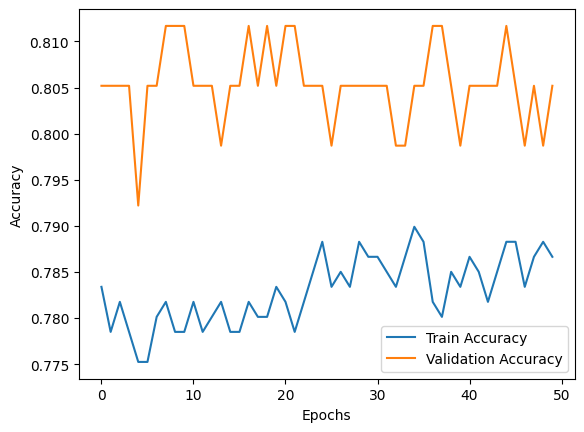

In [11]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Tanh Activation Function

In [13]:
model1 = Sequential()

model1.add(Dense(16, input_shape=(8,), activation='tanh'))
model1.add(Dense(32, activation='tanh'))
model1.add(Dense(1, activation='sigmoid'))

In [14]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history1 = model1.fit(X_train_scaled, Y_train, epochs=50, validation_data=(X_test_scaled, Y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5914 - loss: 0.6837 - val_accuracy: 0.6883 - val_loss: 0.6106
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7077 - loss: 0.5747 - val_accuracy: 0.7013 - val_loss: 0.5471
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7338 - loss: 0.5347 - val_accuracy: 0.7273 - val_loss: 0.5089
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7475 - loss: 0.5067 - val_accuracy: 0.7532 - val_loss: 0.4871
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7359 - loss: 0.5076 - val_accuracy: 0.7727 - val_loss: 0.4747
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7459 - loss: 0.5051 - val_accuracy: 0.7922 - val_loss: 0.4633
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7639 - loss: 0.4923 - val_accuracy: 0.7987 - val_loss: 0.4529
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8098 - loss: 0.4480 - val_accuracy: 0.7987 - val_loss

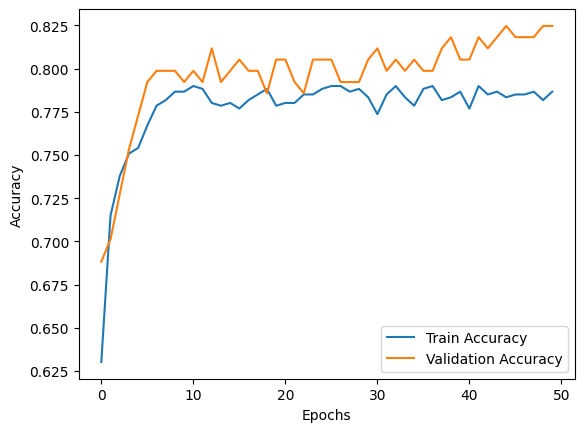

In [18]:
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Relu Activation Function

In [19]:
model2 = Sequential()

model2.add(Dense(16, input_shape=(8,), activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [20]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history2 = model2.fit(X_train_scaled, Y_train, epochs=50, validation_data=(X_test_scaled, Y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6798 - loss: 0.6481 - val_accuracy: 0.6688 - val_loss: 0.6097
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6925 - loss: 0.6077 - val_accuracy: 0.7143 - val_loss: 0.5643
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7211 - loss: 0.5711 - val_accuracy: 0.7403 - val_loss: 0.5359
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7517 - loss: 0.5447 - val_accuracy: 0.7468 - val_loss: 0.5130
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7338 - loss: 0.5547 - val_accuracy: 0.7792 - val_loss: 0.4968
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7395 - loss: 0.5384 - val_accuracy: 0.7857 - val_loss: 0.4856
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7455 - loss: 0.5189 - val_accuracy: 0.7922 - val_loss: 0.4775
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7519 - loss: 0.5125 - val_accuracy: 0.7792 - val

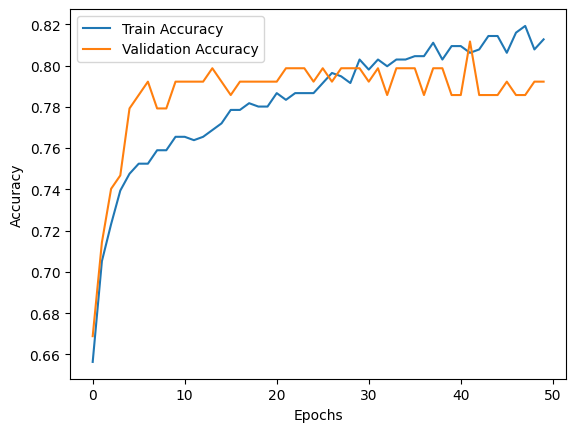

In [22]:
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Leaky Relu Activation Function

In [78]:
model3 = Sequential()

model3.add(Dense(16, input_shape=(8,)))
LeakyReLU(alpha=0.1)
model3.add(Dense(32))
LeakyReLU(alpha=0.1)
model3.add(Dense(1, activation='sigmoid'))

In [79]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
history3 = model3.fit(X_train_scaled, Y_train, epochs=50, validation_data=(X_test_scaled, Y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6794 - loss: 0.6247 - val_accuracy: 0.7597 - val_loss: 0.5234
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7184 - loss: 0.5543 - val_accuracy: 0.7468 - val_loss: 0.4941
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7438 - loss: 0.5159 - val_accuracy: 0.7857 - val_loss: 0.4786
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7430 - loss: 0.5146 - val_accuracy: 0.7922 - val_loss: 0.4625
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7495 - loss: 0.4899 - val_accuracy: 0.7922 - val_loss: 0.4554
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7618 - loss: 0.4799 - val_accuracy: 0.7987 - val_loss: 0.4535
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7618 - loss: 0.4882 - val_accuracy: 0.7987 - val_loss: 0.4518
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7435 - loss: 0.5046 - val_accuracy: 0.7987 - val_loss

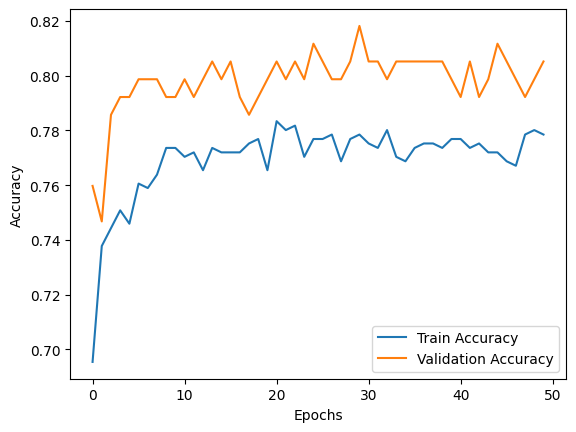

In [81]:
plt.plot(history3.history['accuracy'], label='Train Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Parametric Relu Activation Function

In [102]:
model4 = Sequential()

model4.add(Dense(16, input_shape=(8,)))
PReLU()
model4.add(Dense(32))
PReLU()
model4.add(Dense(1, activation='sigmoid'))

In [103]:
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
history4 = model4.fit(X_train_scaled, Y_train, epochs=50, validation_data=(X_test_scaled, Y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5748 - loss: 0.6784 - val_accuracy: 0.7987 - val_loss: 0.5408
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7507 - loss: 0.5489 - val_accuracy: 0.7857 - val_loss: 0.4912
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7586 - loss: 0.5059 - val_accuracy: 0.7987 - val_loss: 0.4731
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7551 - loss: 0.4875 - val_accuracy: 0.8052 - val_loss: 0.4656
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7633 - loss: 0.4828 - val_accuracy: 0.8052 - val_loss: 0.4605
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7936 - loss: 0.4718 - val_accuracy: 0.8117 - val_loss: 0.4570
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7836 - loss: 0.4485 - val_accuracy: 0.8052 - val_loss: 0.4575
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7755 - loss: 0.4724 - val_accuracy: 0.8117 - val_loss

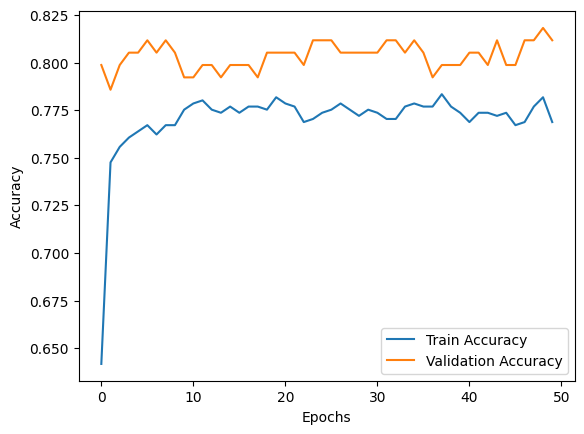

In [105]:
plt.plot(history4.history['accuracy'], label='Train Accuracy')
plt.plot(history4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# ELU Activation Function

In [120]:
model5 = Sequential()

model5.add(Dense(16, input_shape=(8,)))
ELU(alpha=0.9)
model5.add(Dense(32))
ELU(alpha=0.9)
model5.add(Dense(1, activation='sigmoid'))

In [121]:
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [122]:
history5 = model5.fit(X_train_scaled, Y_train, epochs=50, validation_data=(X_test_scaled, Y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.5999 - loss: 0.7354 - val_accuracy: 0.7078 - val_loss: 0.5722
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6928 - loss: 0.5937 - val_accuracy: 0.8182 - val_loss: 0.4968
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7643 - loss: 0.5156 - val_accuracy: 0.7662 - val_loss: 0.4707
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7668 - loss: 0.4939 - val_accuracy: 0.7922 - val_loss: 0.4535
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7720 - loss: 0.4924 - val_accuracy: 0.7792 - val_loss: 0.4488
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7709 - loss: 0.4919 - val_accuracy: 0.7857 - val_loss: 0.4505
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7583 - loss: 0.4955 - val_accuracy: 0.7857 - val_loss: 0.4481
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7407 - loss: 0.4955 - val_accuracy: 0.8182 - val_loss

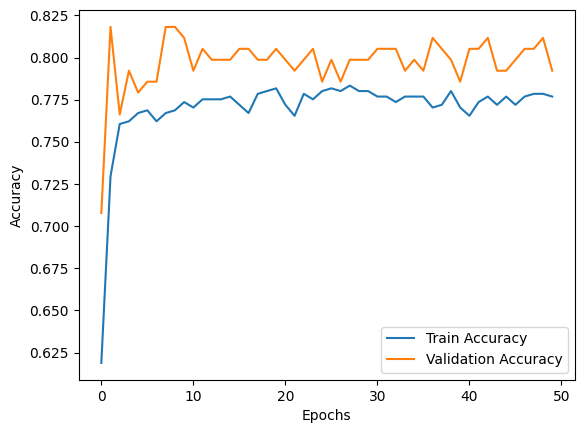

In [123]:
plt.plot(history5.history['accuracy'], label='Train Accuracy')
plt.plot(history5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# SELU Activation Function

In [146]:
model6 = Sequential()

model6.add(Dense(16, input_shape=(8,), activation='selu'))
model6.add(AlphaDropout(0.5))
model6.add(Dense(32, activation='selu'))
model6.add(AlphaDropout(0.5))
model6.add(Dense(1, activation='sigmoid'))

In [147]:
model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [148]:
history6 = model6.fit(X_train_scaled, Y_train, epochs=50, validation_data=(X_test_scaled, Y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5689 - loss: 0.7969 - val_accuracy: 0.5974 - val_loss: 0.7686
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5340 - loss: 0.8013 - val_accuracy: 0.6494 - val_loss: 0.7022
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5418 - loss: 0.7613 - val_accuracy: 0.6688 - val_loss: 0.6668
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5363 - loss: 0.7972 - val_accuracy: 0.6948 - val_loss: 0.6374
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5794 - loss: 0.7084 - val_accuracy: 0.6883 - val_loss: 0.6222
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5634 - loss: 0.7618 - val_accuracy: 0.7078 - val_loss: 0.6125
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5803 - loss: 0.7205 - val_accuracy: 0.7013 - val_loss: 0.6036
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6079 - loss: 0.7389 - val_accuracy: 0.7143 - val_loss

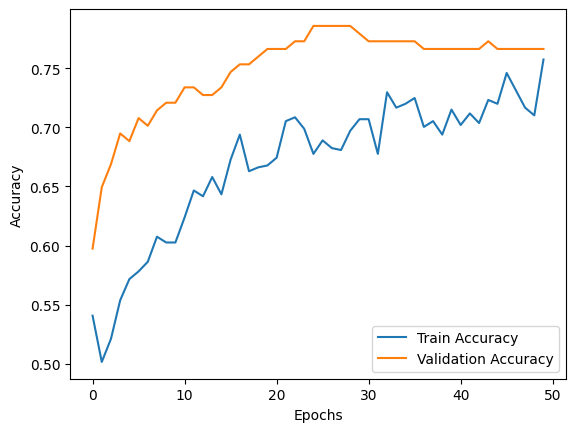

In [149]:
plt.plot(history6.history['accuracy'], label='Train Accuracy')
plt.plot(history6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Swish Activation Function

In [150]:
model7 = Sequential()

model7.add(Dense(16, input_shape=(8,), activation='selu'))
model7.add(Dense(32, activation='selu'))
model7.add(Dense(1, activation='sigmoid'))

In [151]:
model7.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [152]:
history7 = model7.fit(X_train_scaled, Y_train, epochs=50, validation_data=(X_test_scaled, Y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6605 - loss: 0.6961 - val_accuracy: 0.7078 - val_loss: 0.5690
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7152 - loss: 0.5506 - val_accuracy: 0.7597 - val_loss: 0.5099
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7269 - loss: 0.5369 - val_accuracy: 0.7727 - val_loss: 0.4746
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7540 - loss: 0.4909 - val_accuracy: 0.7987 - val_loss: 0.4530
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7667 - loss: 0.4841 - val_accuracy: 0.7987 - val_loss: 0.4456
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7671 - loss: 0.4919 - val_accuracy: 0.8052 - val_loss: 0.4397
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7700 - loss: 0.4647 - val_accuracy: 0.8117 - val_loss: 0.4393
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7767 - loss: 0.4816 - val_accuracy: 0.8117 - val_loss

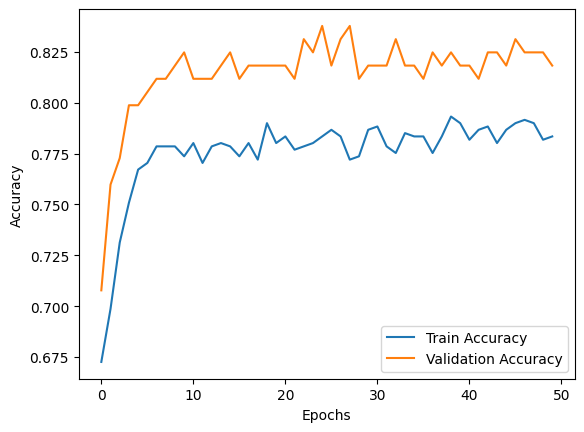

In [153]:
plt.plot(history7.history['accuracy'], label='Train Accuracy')
plt.plot(history7.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()